In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA

<AxesSubplot:xlabel='Outcome', ylabel='count'>

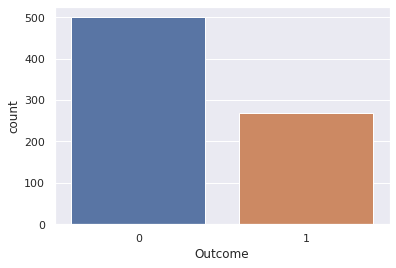

In [7]:
sns.countplot(x='Outcome', data=data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

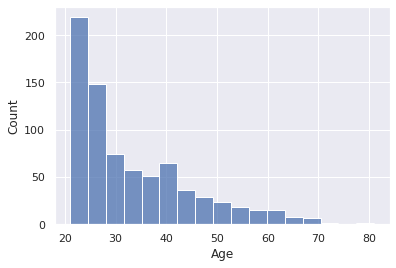

In [8]:
sns.histplot(data=data['Age'])

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

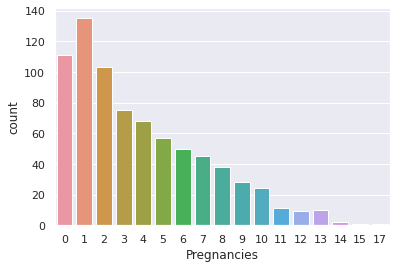

In [9]:
print(data['Pregnancies'].value_counts())
sns.countplot(x='Pregnancies', data=data)

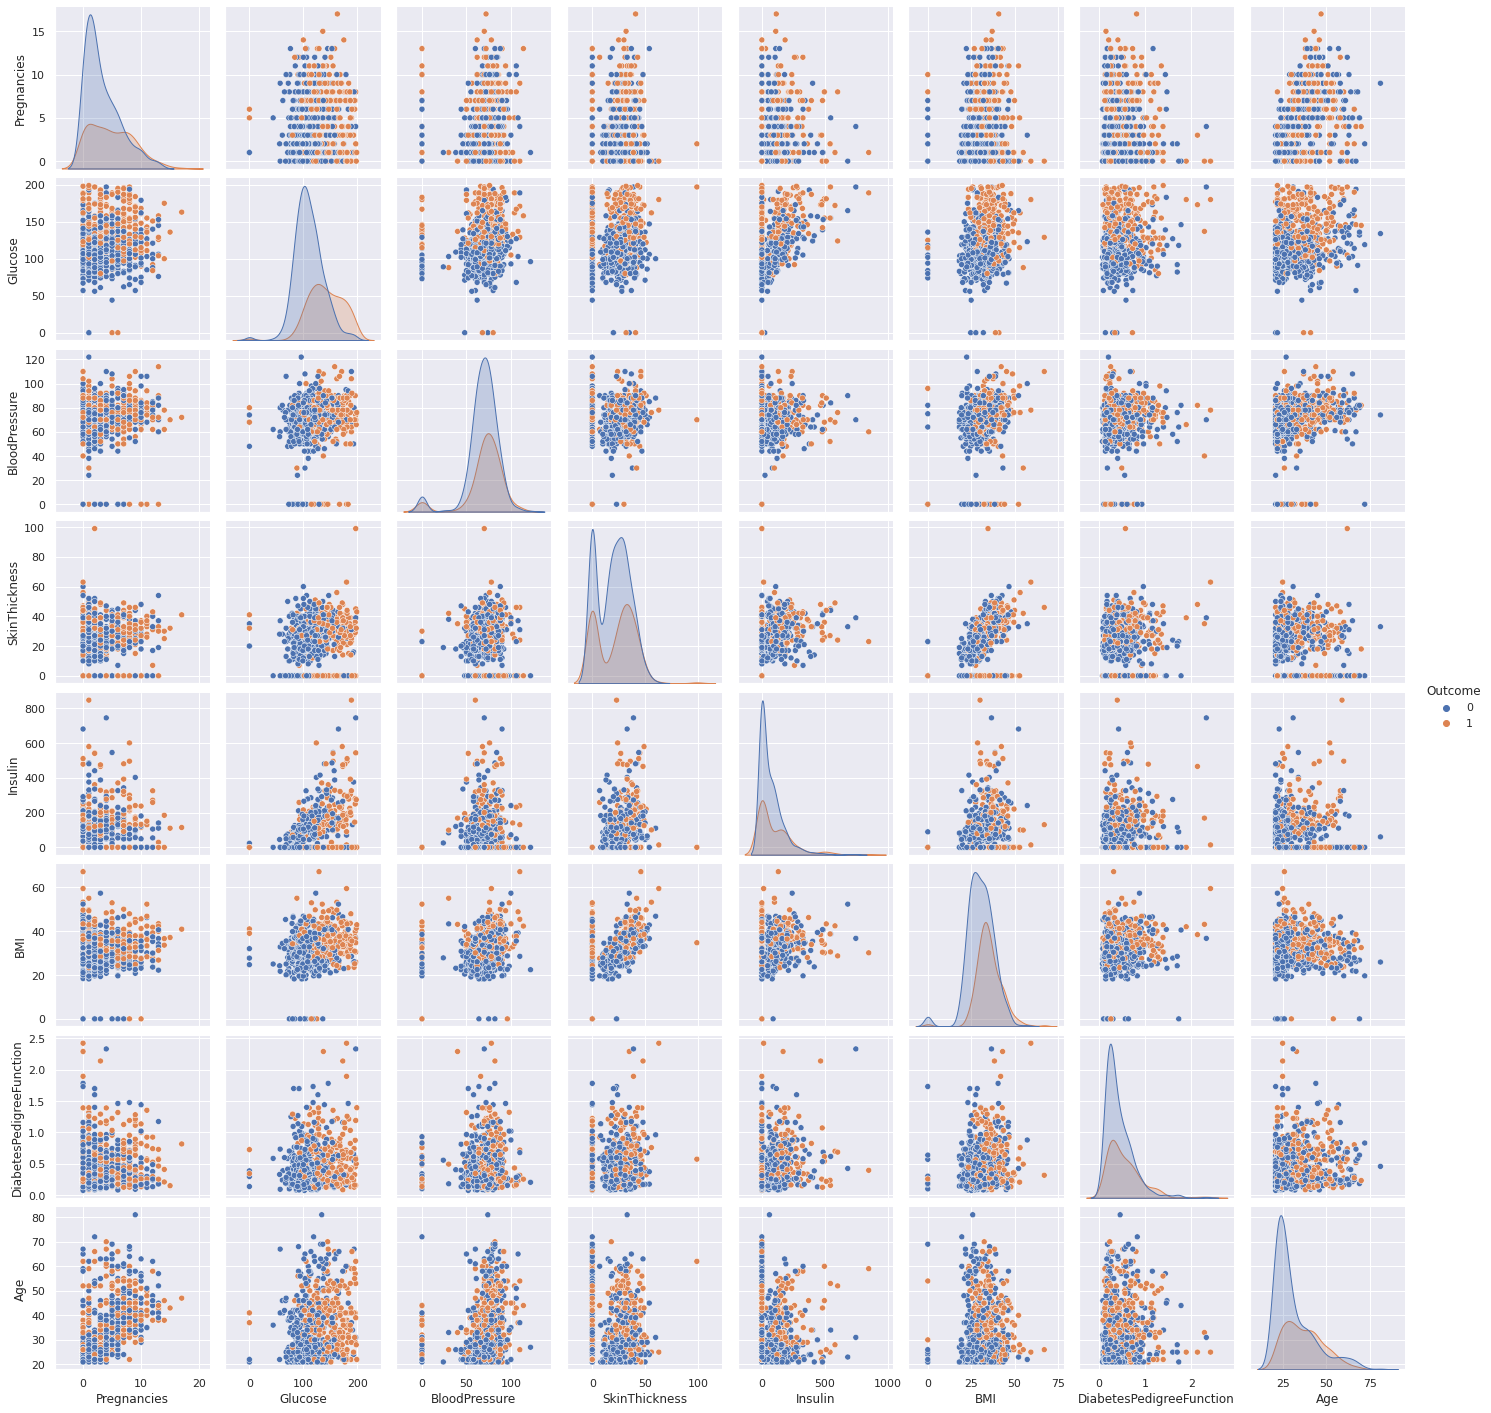

In [14]:
sns.pairplot(data, hue='Outcome')

<AxesSubplot:>

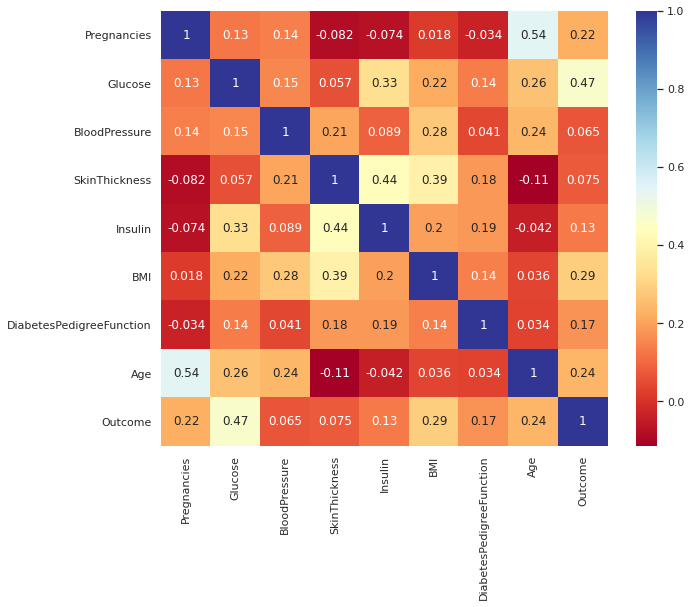

In [16]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='RdYlBu')

In [27]:
from sklearn.utils import shuffle
df = shuffle(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
496,5,110,68,0,0,26.0,0.292,30,0
310,6,80,66,30,0,26.2,0.313,41,0
502,6,0,68,41,0,39.0,0.727,41,1
67,2,109,92,0,0,42.7,0.845,54,0
530,2,122,60,18,106,29.8,0.717,22,0


In [30]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [31]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
496,5,110,68,0,0,26.0,0.292,30
310,6,80,66,30,0,26.2,0.313,41
502,6,0,68,41,0,39.0,0.727,41
67,2,109,92,0,0,42.7,0.845,54
530,2,122,60,18,106,29.8,0.717,22


In [32]:
y.head()

496    0
310    0
502    1
67     0
530    0
Name: Outcome, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = rf_clf.predict(X_test)

Confusion Matrix : 


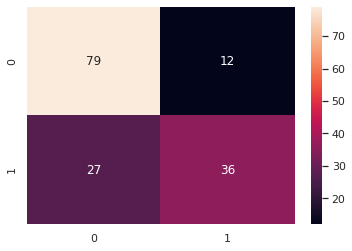

Accuracy Score : 0.7467532467532467


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
sns.heatmap(cm, annot=True)
plt.show()
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)}")

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'f1 Score : {f1_score(y_test, y_pred)}')

Precision Score : 0.75
Recall Score : 0.5714285714285714
f1 Score : 0.6486486486486486


# Hyperparameter Tuning

In [38]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

In [39]:
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(rf_clf, hyperF, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.5s
[CV] END max_depth=5,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]},
                   random_state=42, verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [44]:
y_pred_random = rf_random.predict(X_test)

Confusion Matrix : 


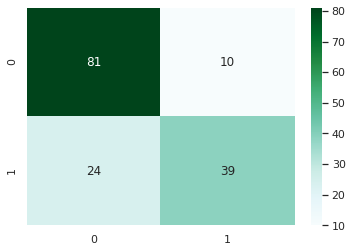

Accuracy Score : 0.7792207792207793


In [45]:
cm = confusion_matrix(y_test, y_pred_random)
print("Confusion Matrix : ")
sns.heatmap(cm, annot=True, cmap='BuGn')
plt.show()
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_random)}")

In [46]:
print(f'Precision Score : {precision_score(y_test, y_pred_random)}')
print(f'Recall Score : {recall_score(y_test, y_pred_random)}')
print(f'f1 Score : {f1_score(y_test, y_pred_random)}')

Precision Score : 0.7959183673469388
Recall Score : 0.6190476190476191
f1 Score : 0.6964285714285715


In [47]:
import pickle
file = open('pkl/diabetes.pkl', 'wb')
pickle.dump(rf_random, file)
file.close()